# Nearest neighbour

In [1]:
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
plt.style.use("seaborn")
colormap='winter'  # winter is coming

## Generate dataset

We use here a function of scikit-learn to easily generate some test data. Here we pick points from three gaussians with random centers.

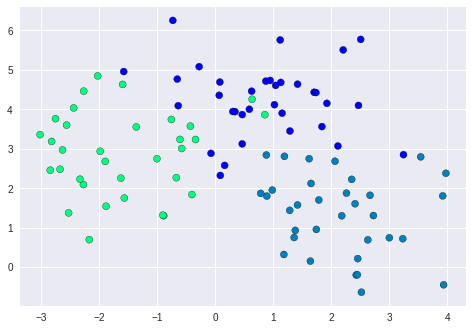

In [2]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=100, centers=3, n_features=2,random_state=0)
# what are these parameters?
# n_samples: how many data points to draw
# centers: how many Gaussians 
# n_features: how many dimensions (features) the data points should have
# random_state: this is the seed of the random number generator 
# thus the data points will be (pseudo-) random but look the same in my and your notebook

fig,ax=plt.subplots()
ax.scatter(X[:,0],X[:,1],c=y,edgecolor='black',cmap=colormap)
plt.show()

## Let's try k-nearest neighbour with a couple of different k

First, some code to plot the decision boundary.

<code>np.linspace(a,b,num)</code> simply returns num many points between a and b with equidistant spacing. <code>np.meshgrid</code> is useful for 2d-plotting. If you want to know what it does, try:

<code>np.meshgrid([0,1,2],[42,44])</code>

In [3]:
# ignore if you want
resolution=500
L1=np.linspace(np.min(X[:,0])-0.5,np.max(X[:,0])+0.5,num=resolution)
L2=np.linspace(np.min(X[:,1])-0.5,np.max(X[:,1])+0.5,num=resolution)
XX,YY=np.meshgrid(L1,L2)

k-nearest neighbours is implemented in scikit-learn, so it's easy to use.  We first set n_neighbors=1, to try out 1-nearest neighbor (ie k=1).

In [4]:
from sklearn.neighbors import KNeighborsClassifier
one_nn=KNeighborsClassifier(n_neighbors=1)
one_nn.fit(X,y)

KNeighborsClassifier(n_neighbors=1)

Let's set up a short function to plot the decision boundary in order to avoid code repetition.

In [5]:
def plot_decision_boundary(nn_classifier):
    fig,ax=plt.subplots()

    # plot the decision boundary
    Z=nn_classifier.predict(np.array([XX.flatten(),YY.flatten()]).T)
    Z=Z.reshape(XX.shape)
    ax.contourf(XX,YY,Z,alpha=0.5,cmap=colormap)

    # we plot the classes with different markers
    markers=['o','P','v','^','<','>','s','*','X'] # these are the names of the different markers
    for i,c in enumerate(set(y)):  # set(y) throws out the repetitions of elements in y
        XXX=[x for x,y in zip(X[:,0],y) if y==c]   
        ## zip is a nifty method that 'zips' two lists together
        ## that is: zip([1,2,3],['a','b','c']) will result in [[1,'a'],[2,'b'],[3,'c']]
        ## fineprint: technically, zip will _not_ return a list but an object that behaves like a list
        ## this is for performance reasons
        YYY=[x for x,y in zip(X[:,1],y) if y==c]
        ax.scatter(XXX,YYY,edgecolor='black',cmap=colormap,marker=markers[i])
    plt.show()  

Let's plot the decision boundary of 1-nearest neighbour.

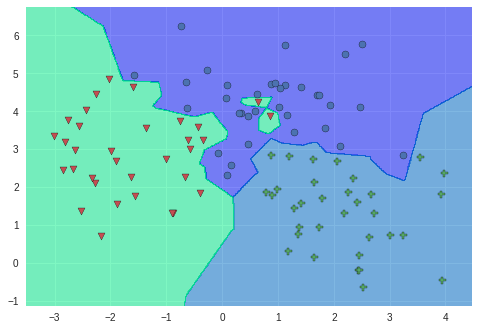

In [6]:
plot_decision_boundary(one_nn)

The decision boundary is quite ragged, and indeed it doesn't capture the ground truth very well. In particular, there certainly shouldn't be a green island in the top area. So, let's increase $k$ to $2$. That is, let's see how $2$-nearest neighbour fares.

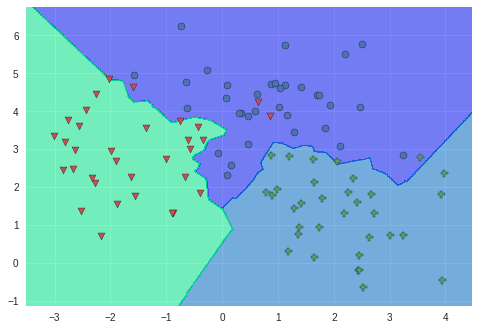

In [7]:
two_nn=KNeighborsClassifier(n_neighbors=2)
two_nn.fit(X,y)
plot_decision_boundary(two_nn)

The green island has vanished and the decision boundary is already quite a bit smoother. Let's increase $k$ more.

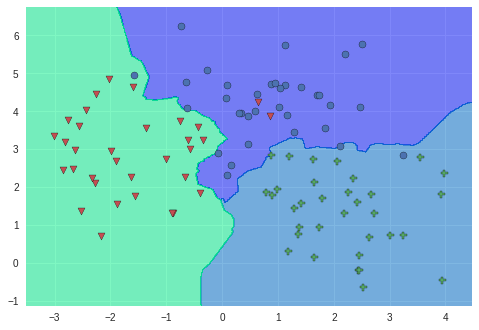

In [8]:
five_nn=KNeighborsClassifier(n_neighbors=5)
five_nn.fit(X,y)
plot_decision_boundary(five_nn)

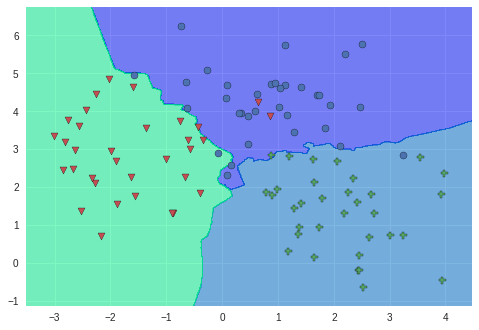

In [9]:
ten_nn=KNeighborsClassifier(n_neighbors=10)
ten_nn.fit(X,y)
plot_decision_boundary(ten_nn)

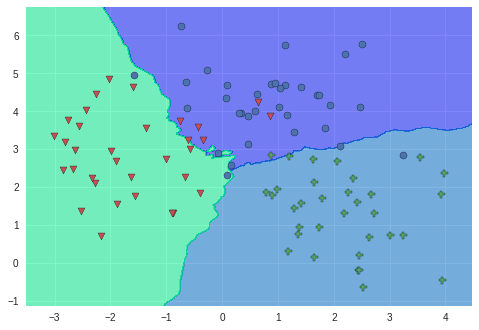

In [10]:
twenty_nn=KNeighborsClassifier(n_neighbors=20)
twenty_nn.fit(X,y)
plot_decision_boundary(twenty_nn)

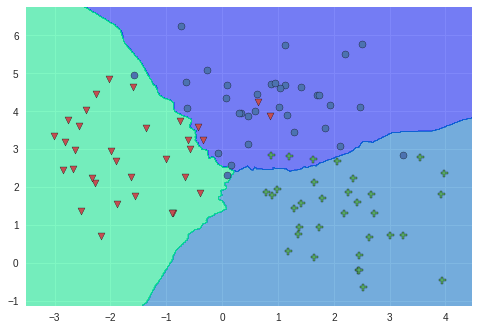

In [11]:
fifty_nn=KNeighborsClassifier(n_neighbors=50)
fifty_nn.fit(X,y)
plot_decision_boundary(fifty_nn)

With larger $k$ the decision boundary becomes smoother but also starts to miss some local pecularities. Setting $k$ to $50$ is, especially considering the small size of the dataset, quite excessive. 

## Play with the code

Apply nearest neighbour to the iris dataset. Which $k$ gives the best result?